### Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan 
### (Label ‘1’ & ’0’)
### Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


======================================================================================================================

## Importing Required Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [2]:
df = pd.read_csv('sample_data_intw.csv',index_col=0)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

## Finding null values

In [5]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

#### < no null values in our dataset >

## column names

In [6]:

df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
correlation = df.corr()
correlation

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


<AxesSubplot:>

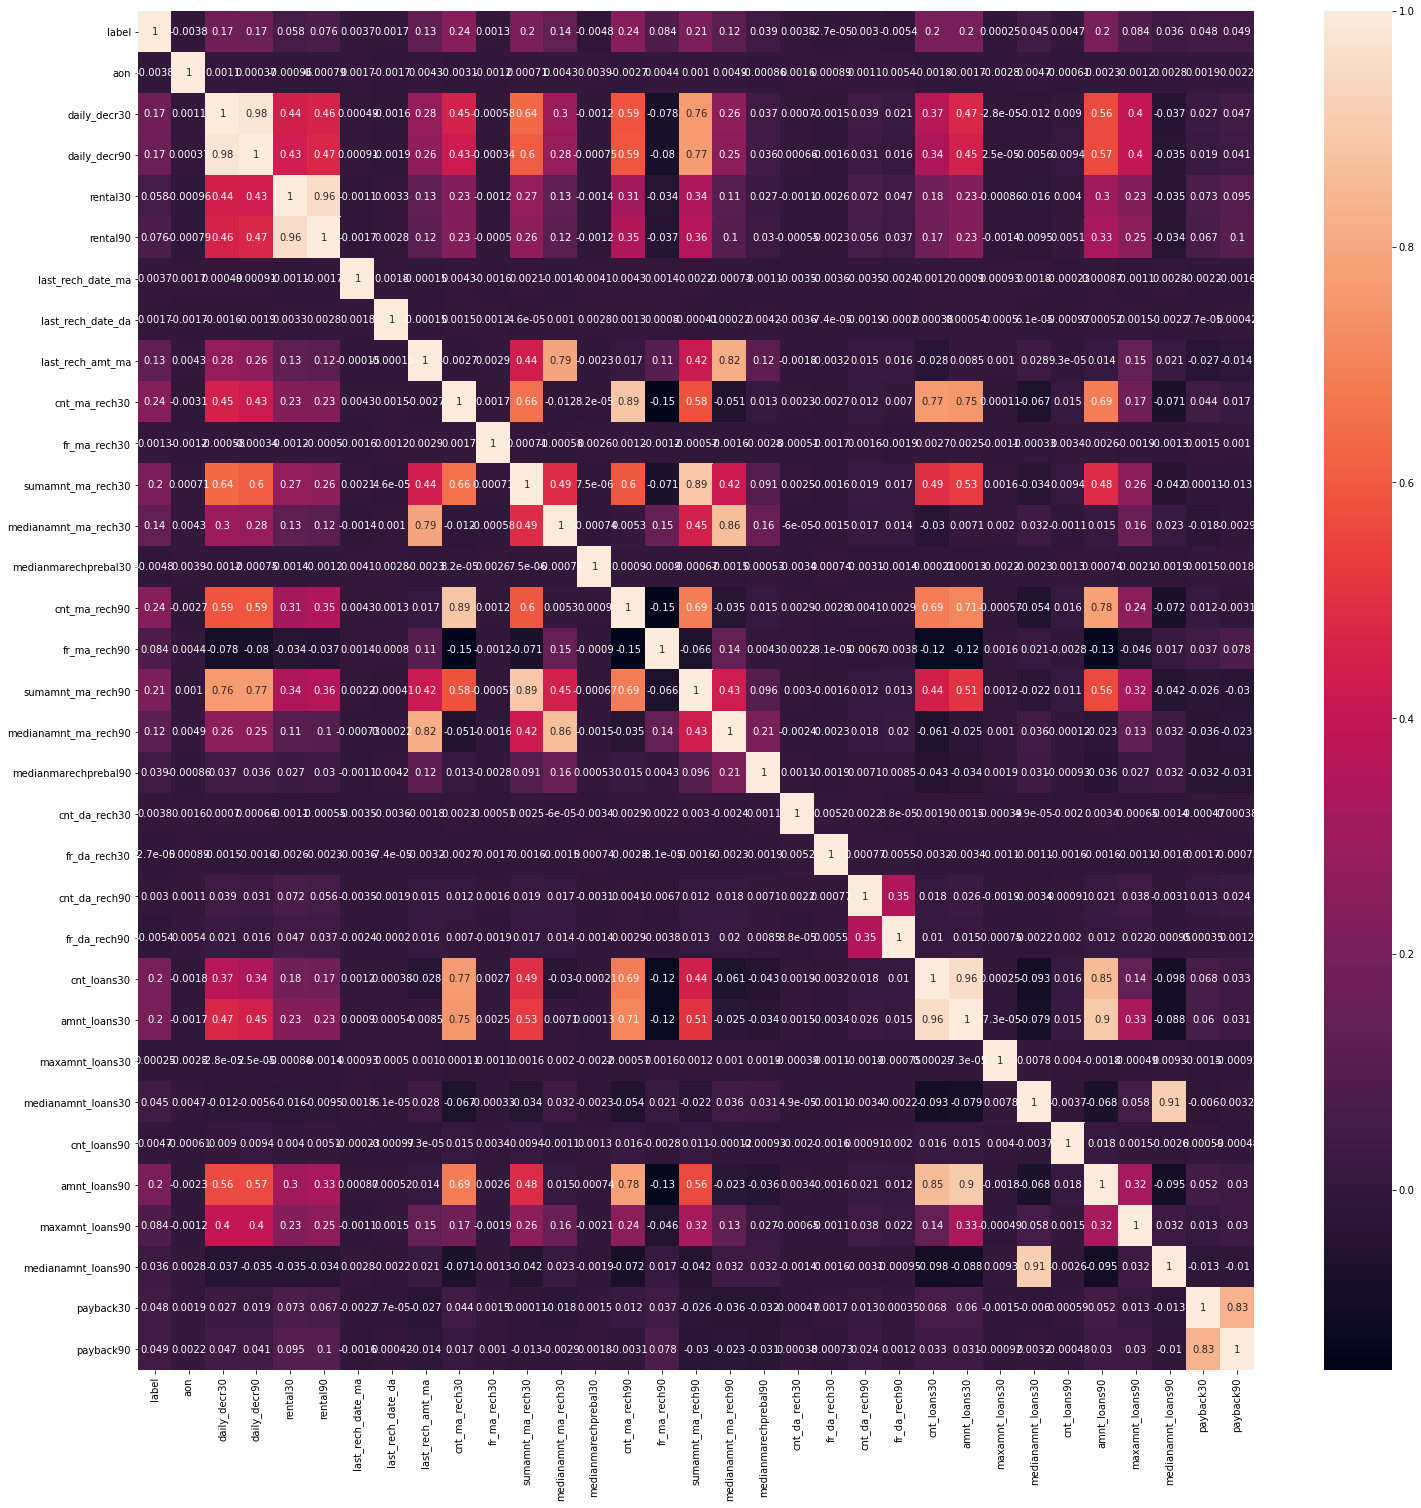

In [9]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot = True)


In [10]:
df=df.drop(columns=['msisdn','pcircle','pdate'])

## separating independent and dependent attributes

In [11]:
y = df["label"]
x = df.drop(labels=["label"],axis=1)

In [12]:
y

1         0
2         1
3         1
4         1
5         1
         ..
209589    1
209590    1
209591    1
209592    1
209593    1
Name: label, Length: 209593, dtype: int64

In [13]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209590,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209591,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209592,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


## reducing/controlling overfitting cases

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
array=x.values
X=array
Y=y.values
model=ExtraTreesClassifier()
model.fit(X,Y)
score=model.feature_importances_
score

array([0.07596839, 0.12407615, 0.11461055, 0.07646065, 0.07302449,
       0.05006225, 0.00385707, 0.02527821, 0.03233742, 0.01617426,
       0.03110043, 0.02976822, 0.03843827, 0.03233928, 0.0348903 ,
       0.03392648, 0.02782611, 0.04475345, 0.00281135, 0.00195342,
       0.0032909 , 0.00102766, 0.01815354, 0.02463137, 0.00214208,
       0.003449  , 0.00707112, 0.02484223, 0.00727648, 0.00389057,
       0.01649551, 0.0180728 ])

In [16]:
temp=list(zip(x.columns,score))
from operator import itemgetter
sorted(temp,key=itemgetter(1),reverse=True)

[('daily_decr30', 0.12407615115519458),
 ('daily_decr90', 0.11461055415401292),
 ('rental30', 0.07646064877918174),
 ('aon', 0.07596838521483873),
 ('rental90', 0.07302448986083297),
 ('last_rech_date_ma', 0.05006225235994575),
 ('medianmarechprebal90', 0.04475344733175035),
 ('medianmarechprebal30', 0.03843827064177859),
 ('fr_ma_rech90', 0.03489030358812318),
 ('sumamnt_ma_rech90', 0.033926480916078215),
 ('cnt_ma_rech90', 0.032339275339056776),
 ('cnt_ma_rech30', 0.032337415146445586),
 ('sumamnt_ma_rech30', 0.031100433602132774),
 ('medianamnt_ma_rech30', 0.029768218309145496),
 ('medianamnt_ma_rech90', 0.027826110314929164),
 ('last_rech_amt_ma', 0.025278206536994058),
 ('amnt_loans90', 0.024842234593511647),
 ('amnt_loans30', 0.024631372927444665),
 ('cnt_loans30', 0.018153535377347933),
 ('payback90', 0.018072796706923685),
 ('payback30', 0.01649551073572578),
 ('fr_ma_rech30', 0.016174256664905226),
 ('maxamnt_loans90', 0.007276482471053202),
 ('cnt_loans90', 0.0070711167796682

Removing the columns having score less than 0.01

In [17]:
x=x.drop(['last_rech_date_da','cnt_loans90','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','cnt_loans90','medianamnt_loans30','medianamnt_loans90'],  axis=1)

In [18]:
x=x.drop(["cnt_da_rech30","cnt_da_rech90","fr_da_rech90"],axis=1)

In [19]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,...,2,21,3078,1539.0,7.50,2,12,12,29.000000,29.000000
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,...,1,0,5787,5787.0,61.04,1,12,12,0.000000,0.000000
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,...,1,0,1539,1539.0,66.32,1,6,6,0.000000,0.000000
4,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,...,1,0,947,947.0,2.50,2,12,12,0.000000,0.000000
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,...,8,2,23496,2888.0,35.00,7,42,42,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,10404.0,...,3,2,10404,3178.0,91.81,2,12,12,1.000000,1.000000
209590,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,3092.0,...,6,2,4038,773.0,111.80,3,18,18,1.000000,1.000000
209591,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,9334.0,...,11,5,18592,1539.0,47.13,4,42,54,4.000000,3.833333
209592,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,12154.0,...,6,4,17941,2410.5,100.00,2,18,24,0.000000,10.500000


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
X_train

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90
176407,278.0,2035.370000,2036.110,3844.37,4192.37,18.0,1547,1,0.0,1547.0,...,1,0,1547,1547.0,31.00,1,6,18,0.0,11.0
118037,1732.0,790.394000,795.070,2848.82,3287.10,69.0,8000,0,0.0,0.0,...,1,0,8000,8000.0,3541.17,1,6,6,0.0,0.0
141694,115.0,70.616000,70.616,-157.64,-157.64,6.0,1539,3,8.0,15578.0,...,3,8,15578,1539.0,91.00,2,12,12,0.0,0.0
66660,989.0,1518.000000,1518.000,1304.35,1304.35,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0.00,1,6,6,0.0,0.0
125632,238.0,735.129333,738.210,1240.12,1328.70,3.0,770,5,5.0,4619.0,...,7,34,5565,770.0,2.00,1,6,12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176964,72.0,237.116000,237.116,-325.04,-325.04,1.0,10000,4,7.0,34000.0,...,4,7,34000,8000.0,114.50,1,6,6,0.0,0.0
117953,897.0,16.900000,16.900,63.05,63.05,2.0,773,1,0.0,773.0,...,1,0,773,773.0,91.00,1,6,6,0.0,0.0
173686,118.0,439.156000,508.390,639.72,1599.30,25.0,1539,2,4.0,3078.0,...,9,2,13863,1539.0,38.60,2,12,12,0.0,0.0
43568,154.0,42.294000,42.294,-174.51,-174.51,4.0,1539,2,28.0,3848.0,...,2,28,3848,1924.0,58.50,2,12,12,11.0,11.0


In [22]:
y_train

176407    1
118037    1
141694    1
66660     1
125632    1
         ..
176964    1
117953    1
173686    1
43568     1
199341    1
Name: label, Length: 167674, dtype: int64

In [23]:
X_test

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90
23413,1239.0,5762.280000,5803.80,725.38,879.10,1.0,773,15,1.0,11571.0,...,17,1,13114,770.0,67.00,12,72,78,2.818182,4.769231
106458,607.0,12325.978000,12365.89,952.44,1961.88,13.0,3178,4,4.0,8665.0,...,7,4,13290,1539.0,46.32,1,12,12,0.000000,0.000000
160065,417.0,1200.000000,1200.00,96.56,96.56,2.0,773,1,0.0,773.0,...,1,0,773,773.0,10.00,1,6,6,0.000000,0.000000
46826,300.0,850.000000,1600.00,869.56,969.12,32.0,770,0,0.0,0.0,...,1,0,770,770.0,41.20,1,6,6,0.000000,0.000000
86928,977.0,6545.322000,6601.69,612.39,740.39,14.0,1539,3,11.0,7895.0,...,5,15,12627,3178.0,27.67,4,24,42,2.000000,2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157032,1108.0,5727.000000,5727.00,11458.14,14960.60,16.0,5787,1,0.0,5787.0,...,2,0,11574,5787.0,15.40,1,6,6,0.000000,0.000000
43222,241.0,6267.386000,6297.98,2937.16,3460.42,1.0,2309,10,2.0,10011.0,...,12,2,12323,770.0,9.58,8,60,72,2.666667,2.636364
129881,735.0,6.066667,7.00,3608.92,4030.36,17.0,773,1,0.0,773.0,...,1,0,773,773.0,9.52,1,6,6,0.000000,0.000000
60200,1441.0,0.000000,0.00,0.00,0.00,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0.00,1,6,6,0.000000,0.000000


In [24]:
y_test

23413     1
106458    1
160065    0
46826     1
86928     0
         ..
157032    0
43222     1
129881    0
60200     1
13525     1
Name: label, Length: 41919, dtype: int64

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5],
            'criterion': ["gini","entropy"]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs',multi_class='auto'),
        'params': {
            'C': [1,5],
            "penalty": ["l1","l2"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    },
    "SVM":{
        'model': SVC(probability=True),
        'params':{
            'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
        }
    }
    
}

#  Model Without Preprocessing 

In [78]:
accuray = []

for model, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train.iloc[:1000,][:] , y_train[:1000])
    accuray.append({
        'model': model,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
accuray

[{'model': 'random_forest',
  'best_score': 0.8930067792343243,
  'best_params': {'criterion': 'gini', 'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.8700107292921664,
  'best_params': {'C': 5, 'penalty': 'l2'}},
 {'model': 'decision_tree',
  'best_score': 0.8500026973080866,
  'best_params': {'criterion': 'entropy'}},
 {'model': 'SVM',
  'best_score': 0.886997776219333,
  'best_params': {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}}]

In [29]:
check = pd.DataFrame(accuray,columns=['model','best_score','best_params'])
check

,model,best_score,best_params
0,random_forest,0.893996,"{'criterion': 'entropy', 'n_estimators': 5}"
1,logistic_regression,0.870011,"{'C': 5, 'penalty': 'l2'}"
2,decision_tree,0.842013,{'criterion': 'entropy'}
3,SVM,0.886998,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}"


### we got better accuracy in Model -> Random forest and logistic regression so moving further to apply these model to get our probability.

# LogisticRegression

In [30]:
log=LogisticRegression(solver='lbfgs',multi_class='auto',  C=5, penalty='l2')

In [79]:
log.fit(X_train.iloc[:1000,][:] , y_train[:1000])

LogisticRegression(C=5)

In [32]:
y_pred=log.predict(X_test)
y_pred_T=log.predict(X_train)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[ 1117  4194]
 [ 1163 35445]]


In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.21      0.29      5311
           1       0.89      0.97      0.93     36608

    accuracy                           0.87     41919
   macro avg       0.69      0.59      0.61     41919
weighted avg       0.84      0.87      0.85     41919



In [35]:
t=accuracy_score(y_test, y_pred)
te=accuracy_score(y_train, y_pred_T)

In [36]:
print("accuracy_score- Y_train",te,"  ","Y_test",t)


accuracy_score- Y_train 0.8745959421257917    Y_test 0.8722059209427706


# RandomForestClassifier

In [37]:
tree=RandomForestClassifier(criterion ='entropy', n_estimators= 5)

In [38]:
tree.fit(X_train.iloc[:1000,][:] , y_train[:1000])

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [39]:
y_pred_tree=tree.predict(X_test)
y_pred_T_tree=tree.predict(X_train)

In [40]:
print(confusion_matrix(y_test, y_pred_tree))

[[ 1874  3437]
 [ 1205 35403]]


In [41]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.61      0.35      0.45      5311
           1       0.91      0.97      0.94     36608

    accuracy                           0.89     41919
   macro avg       0.76      0.66      0.69     41919
weighted avg       0.87      0.89      0.88     41919



In [42]:
tree_test=accuracy_score(y_test, y_pred_tree)
tree_train=accuracy_score(y_train, y_pred_T_tree)

In [83]:
print("random forest accuracy_score- Y_train",tree_train,"  ","Y_test",tree_test)

random forest accuracy_score- Y_train 0.8914023641113112    Y_test 0.8892626255397313


# Model With Preprocessing

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
std=StandardScaler()

In [46]:
std.fit(X_train)

StandardScaler()

In [47]:
X_train_std=std.transform(X_train)

In [48]:
X_test_std=std.transform(X_test)

In [49]:
X_train_std

array([[-0.10198669, -0.36175378, -0.36942209, ..., -0.21278483,
        -0.3869368 ,  0.64639959],
       [-0.08251512, -0.49696334, -0.48332577, ..., -0.66686553,
        -0.3869368 , -0.4195276 ],
       [-0.10416954, -0.57513422, -0.54981676, ..., -0.43982518,
        -0.3869368 , -0.4195276 ],
       ...,
       [-0.10412937, -0.53510924, -0.5096375 , ..., -0.43982518,
        -0.3869368 , -0.4195276 ],
       [-0.10364726, -0.5782101 , -0.55241618, ..., -0.43982518,
         0.86779111,  0.64639959],
       [-0.10368744,  0.24440604,  0.14350977, ..., -0.66686553,
        -0.3869368 , -0.4195276 ]])

In [80]:
accuray_std = []

for model, mp in model_params.items():
    clf_std=  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf_std.fit(X_train_std[:1000,:] , y_train[:1000])
    accuray_std.append({
        'model': model,
        'best_score': clf_std.best_score_,
        'best_params': clf_std.best_params_
    })
    


In [51]:
check_std_1= pd.DataFrame(accuray_std,columns=['model','best_score','best_params'])
check_std_1

,model,best_score,best_params
0,random_forest,0.903026,"{'criterion': 'entropy', 'n_estimators': 5}"
1,logistic_regression,0.877998,"{'C': 1, 'penalty': 'l2'}"
2,decision_tree,0.844000,{'criterion': 'entropy'}
3,SVM,0.887001,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"


# LogisticRegression after Preprocessing

In [52]:
log1=LogisticRegression(solver='lbfgs',multi_class='auto',  C=1, penalty='l2')

In [53]:
log1.fit(X_train_std[:1000,:] , y_train[:1000])

LogisticRegression(C=1)

In [54]:
y_pred1=log1.predict(X_test_std)
y_pred_T1=log1.predict(X_train_std)

In [55]:
print(confusion_matrix(y_test, y_pred1))

[[   73  5238]
 [   65 36543]]


In [56]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.01      0.03      5311
           1       0.87      1.00      0.93     36608

    accuracy                           0.87     41919
   macro avg       0.70      0.51      0.48     41919
weighted avg       0.83      0.87      0.82     41919



In [57]:
t1=accuracy_score(y_test, y_pred1)
te1=accuracy_score(y_train, y_pred_T1)

In [58]:
print("accuracy_score- Y_train",t1,"  ","Y_test",te1)

accuracy_score- Y_train 0.8734941196116319    Y_test 0.8758901201140308


#  RandomForestClassifier after Preprocessing

In [59]:
tree1=RandomForestClassifier(criterion='gini', n_estimators= 5)

In [60]:
tree1.fit(X_train_std[:1000,:] , y_train[:1000])

RandomForestClassifier(n_estimators=5)

In [61]:
y_pred_tree1=tree1.predict(X_test_std)
y_pred_T_tree1=tree1.predict(X_train_std)

In [62]:
print(confusion_matrix(y_test, y_pred_tree1))

[[ 1808  3503]
 [ 1240 35368]]


In [63]:
print(classification_report(y_test, y_pred_tree1))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43      5311
           1       0.91      0.97      0.94     36608

    accuracy                           0.89     41919
   macro avg       0.75      0.65      0.68     41919
weighted avg       0.87      0.89      0.87     41919



In [64]:
tree_test1=accuracy_score(y_test, y_pred_tree1)
tree_train1=accuracy_score(y_train, y_pred_T_tree1)

In [65]:
print("accuracy_score- Y_train",tree_train1,"  ","Y_test",tree_test1)

accuracy_score- Y_train 0.8870546417452915    Y_test 0.8868532169183425


### finding probability 

In [66]:
probability=tree.predict_proba(X_test)

In [67]:
print(probability)

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 ...
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]]


In [68]:
df_final=pd.concat([X_test,y_test],axis=1)
df_final


,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90,label
23413,1239.0,5762.280000,5803.80,725.38,879.10,1.0,773,15,1.0,11571.0,...,1,13114,770.0,67.00,12,72,78,2.818182,4.769231,1
106458,607.0,12325.978000,12365.89,952.44,1961.88,13.0,3178,4,4.0,8665.0,...,4,13290,1539.0,46.32,1,12,12,0.000000,0.000000,1
160065,417.0,1200.000000,1200.00,96.56,96.56,2.0,773,1,0.0,773.0,...,0,773,773.0,10.00,1,6,6,0.000000,0.000000,0
46826,300.0,850.000000,1600.00,869.56,969.12,32.0,770,0,0.0,0.0,...,0,770,770.0,41.20,1,6,6,0.000000,0.000000,1
86928,977.0,6545.322000,6601.69,612.39,740.39,14.0,1539,3,11.0,7895.0,...,15,12627,3178.0,27.67,4,24,42,2.000000,2.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157032,1108.0,5727.000000,5727.00,11458.14,14960.60,16.0,5787,1,0.0,5787.0,...,0,11574,5787.0,15.40,1,6,6,0.000000,0.000000,0
43222,241.0,6267.386000,6297.98,2937.16,3460.42,1.0,2309,10,2.0,10011.0,...,2,12323,770.0,9.58,8,60,72,2.666667,2.636364,1
129881,735.0,6.066667,7.00,3608.92,4030.36,17.0,773,1,0.0,773.0,...,0,773,773.0,9.52,1,6,6,0.000000,0.000000,0
60200,1441.0,0.000000,0.00,0.00,0.00,0.0,0,0,0.0,0.0,...,0,0,0.0,0.00,1,6,6,0.000000,0.000000,1


In [69]:
df_final["Probability[0,1]"]=[i for i in probability ]

In [81]:
Probability = df_final.iloc[:,-2:]

In [82]:
Probability

,label,"Probability[0,1]"
23413,1,"[0.0, 1.0]"
106458,1,"[0.0, 1.0]"
160065,0,"[0.2, 0.8]"
46826,1,"[0.0, 1.0]"
86928,0,"[0.0, 1.0]"
...,...,...
157032,0,"[0.0, 1.0]"
43222,1,"[0.0, 1.0]"
129881,0,"[1.0, 0.0]"
60200,1,"[0.8, 0.2]"


## so, this dataframe 'Probability' gives us corresponding probability of each id and shows the chances of person going to pay loan amount with in 5 days.